# Relative Strength Index **(RSI)** as a trading strategy for cryptos
* Used to indicate over-bought or over-sold conditions in the market
* Over-bought when RSI index exceeds 80 and over-sold when RSI index dips below 20
* Can give false signals in volatile markets - should be used with other indicators <br>
*Source: https://www.investopedia.com/ask/answers/012015/how-do-i-use-relative-strength-index-rsi-create-forex-trading-strategy.asp#:~:text=The%20relative%20strength%20index%20(RSI,and%20therefore%20likely%20to%20retrace.* <br>

*Source code: https://www.youtube.com/watch?v=fxLsSax7rvY&t=97s&ab_channel=ComputerScience* 



In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
# %config IPCompleter.greedy=True

In [4]:
# Read the file in from device
# Data was aquired from: https://in.finance.yahoo.com/quote/BTC-INR/history/
date_cols = ['Date']
df = pd.read_csv('BTC_INR_2years_10Nov2020.csv', parse_dates=date_cols, index_col=['Date'])

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-10,462866.68750,466574.06250,462807.28125,464540.25000,464540.25000,268561593600
2018-11-11,464859.90625,465557.15625,461301.75000,465104.40625,465104.40625,285758394730
2018-11-12,465139.96875,467847.50000,463837.28125,464650.34375,464650.34375,313286210330
2018-11-13,464790.37500,462823.71875,458803.37500,461472.18750,461472.18750,326815269988
2018-11-14,460873.53125,460636.00000,399751.75000,415338.90625,415338.90625,535531577730


In [6]:
# Check of null values in the data
filt = df['Close'].isnull()
df[filt]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


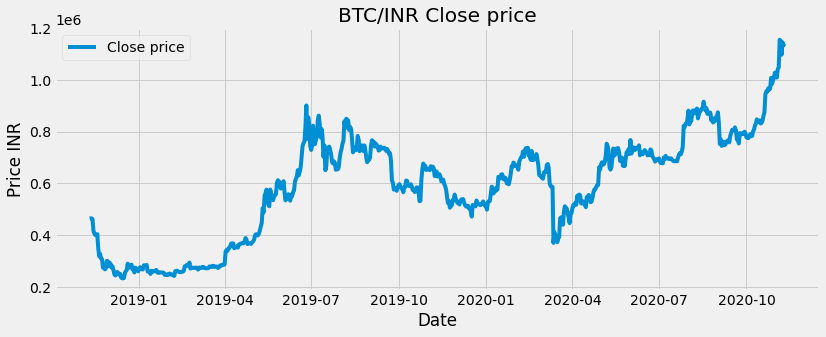

In [7]:
# Visualise
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'], label='Close price')
plt.legend(loc='upper left')
plt.title('BTC/INR Close price')
plt.xlabel('Date')
plt.ylabel('Price INR')
plt.show()


In [8]:
# Prepare the data to calculate the RSI

# Get the difference in price from the previous day
delta = df['Close'].diff(1)
delta

Date
2018-11-10            NaN
2018-11-11      564.15625
2018-11-12     -454.06250
2018-11-13    -3178.15625
2018-11-14   -46133.28125
                 ...     
2020-11-06    -3469.12500
2020-11-07   -54163.50000
2020-11-08    47729.12500
2020-11-09   -11209.12500
2020-11-10     5834.00000
Name: Close, Length: 732, dtype: float64

In [9]:
# Get rid of the first NaN value
delta = delta.dropna()
delta

Date
2018-11-11      564.15625
2018-11-12     -454.06250
2018-11-13    -3178.15625
2018-11-14   -46133.28125
2018-11-15    -9235.93750
                 ...     
2020-11-06    -3469.12500
2020-11-07   -54163.50000
2020-11-08    47729.12500
2020-11-09   -11209.12500
2020-11-10     5834.00000
Name: Close, Length: 731, dtype: float64

In [10]:
# Get the positive gains (up) and the negative gains (down)
up = delta.copy()
down = delta.copy()

up[up<0] = 0 # Any values that are less than 0 will be 0. Only contains positive values
down[down>0] = 0 # Any values in down that are greater than 0 will be set to 0. Only contains negative values

In [11]:
# Get the time period
period = 14

# Calculate the average gain and average loss
AVG_gain = up.rolling(window=period).mean()
AVG_loss = abs(down.rolling(window=period).mean())

In [12]:
# Calculate the Relative Strength (RS)
RS = AVG_gain/AVG_loss

# Caculate the RSI
RSI = 100.0 - (100.0/(1.0 + RS))

In [13]:
# Create new df

new_df = pd.DataFrame()
new_df['Close'] = df['Close']
new_df['RSI'] = RSI

new_df

,Close,RSI
Date,,
2018-11-10,4.645402e+05,NaN
2018-11-11,4.651044e+05,NaN
2018-11-12,4.646503e+05,NaN
2018-11-13,4.614722e+05,NaN
2018-11-14,4.153389e+05,NaN
...,...,...
2020-11-06,1.151582e+06,82.813438
2020-11-07,1.097418e+06,69.002515
2020-11-08,1.145147e+06,73.882651


In [14]:
high = 90
low = 20

buy_condition = [new_df['RSI'] >= high]
buy_action = [new_df['Close']]
new_df['Sell'] = np.select(buy_condition, buy_action, default=np.nan)

sell_condition = [new_df['RSI'] <= low]
sell_action = [new_df['Close']]
new_df['Buy'] = np.select(sell_condition, sell_action, default=np.nan)

In [15]:
new_df

,Close,RSI,Sell,Buy
Date,,,,
2018-11-10,4.645402e+05,NaN,NaN,NaN
2018-11-11,4.651044e+05,NaN,NaN,NaN
2018-11-12,4.646503e+05,NaN,NaN,NaN
2018-11-13,4.614722e+05,NaN,NaN,NaN
2018-11-14,4.153389e+05,NaN,NaN,NaN
...,...,...,...,...
2020-11-06,1.151582e+06,82.813438,NaN,NaN
2020-11-07,1.097418e+06,69.002515,NaN,NaN
2020-11-08,1.145147e+06,73.882651,NaN,NaN


In [16]:
# function to get buy & sell signal

# def get_signal(data, high, low):

#     buy_signal = []
#     sell_signal = []

#     for i in range(len(data['RSI'])):
#         if data['RSI'][i] >= high:
#             sell_signal.append(data['Close'][i])
#             buy_signal.append(np.nan)
#         elif data['RSI'][i] <= low:
#             buy_signal.append(data['Close'][i])
#             sell_signal.append(np.nan)
#         else:
#             buy_signal.append(np.nan)
#             sell_signal.append(np.nan)
    
#     return (buy_signal, sell_signal) 


In [17]:
# new_df['Buy'] = get_signal(new_df,90,20)[0]
# new_df['Sell'] = get_signal(new_df,90,20)[1]

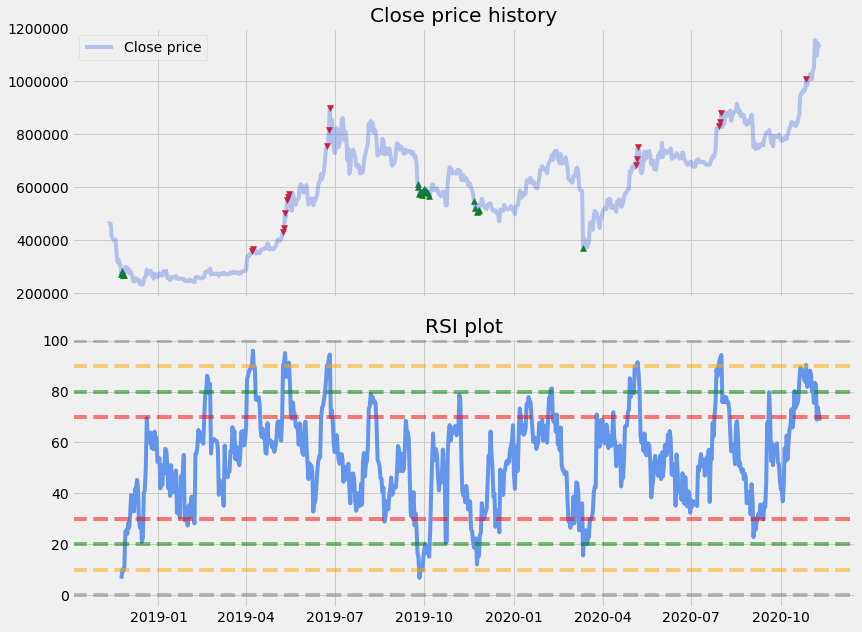

In [294]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12.2, 9))

ax1.plot(new_df.index, new_df['Close'], label='Close price', color='royalblue', alpha=0.35)
ax1.set_title('Close price history')
ax1.legend(loc='upper left')
ax1.scatter(new_df.index, new_df['Buy'], color='green', label='Buy Signal', marker='^', alpha=1)
ax1.scatter(new_df.index, new_df['Sell'], color='red', label='Sell Signal', marker='v', alpha=1)
ax1.ticklabel_format(style='plain', axis='y')

ax2.set_title('RSI plot')
ax2.plot(new_df.index, new_df['RSI'], color='cornflowerblue')
ax2.axhline(0, linestyle='--', alpha=0.5, color='grey')
ax2.axhline(10, linestyle='--', alpha=0.5, color='orange')
ax2.axhline(20, linestyle='--', alpha=0.5, color='green')
ax2.axhline(30, linestyle='--', alpha=0.5, color='red')
ax2.axhline(70, linestyle='--', alpha=0.5, color='red')
ax2.axhline(80, linestyle='--', alpha=0.5, color='green')
ax2.axhline(90, linestyle='--', alpha=0.5, color='orange')
ax2.axhline(100, linestyle='--', alpha=0.5, color='grey')

plt.tight_layout()
plt.show()


In [315]:
buys = new_df[new_df['Buy'].notnull()]
sells = new_df[new_df['Sell'].notnull()]

In [317]:
buys

,Close,RSI,Sell,Buy
Date,,,,
2018-11-24,273888.53125,6.419557,NaN,273888.53125
2018-11-25,283291.34375,10.054090,NaN,283291.34375
2018-11-26,267640.50000,9.424731,NaN,267640.50000
2018-11-27,270873.75000,10.754102,NaN,270873.75000
2019-09-24,611785.25000,16.409695,NaN,611785.25000
2019-09-25,602472.68750,14.884756,NaN,602472.68750
2019-09-26,576215.68750,6.763544,NaN,576215.68750
2019-09-27,583067.12500,10.302205,NaN,583067.12500
2019-09-28,581412.25000,10.223910,NaN,581412.25000


In [322]:
sells

,Close,RSI,Sell,Buy
Date,,,,
2019-04-07,3.596094e+05,90.929760,359609.37500,NaN
2019-04-08,3.679697e+05,96.116447,367969.68750,NaN
2019-05-09,4.334522e+05,90.395748,433452.21875,NaN
2019-05-10,4.460888e+05,91.370686,446088.84375,NaN
2019-05-11,5.038477e+05,95.149799,503847.68750,NaN
2019-05-13,5.518166e+05,90.855267,551816.62500,NaN
2019-05-14,5.621297e+05,91.031764,562129.68750,NaN
2019-05-15,5.761603e+05,91.403254,576160.31250,NaN
2019-06-23,7.553156e+05,90.369866,755315.62500,NaN


In [327]:
def get_buy_sell_pairs(buys_df, sells_df):
    ''' Takes a buy dataframe (buys_df) & and sell dataframe (sells_df)
        and returns buy/sell pairs such that the buy date is before the 
        sell date.    
    '''
    pairs = []
    date_set = set()

    for buy_date, buy_row in buys_df.iterrows():
        for sell_date, sell_row in sells_df.iterrows():
            if (buy_date.date() not in date_set) and (sell_date.date() not in date_set) and (buy_date.date() < sell_date.date()):
                pairs.append((buy_row['Buy'], sell_row['Sell']))
                date_set.add(buy_date.date())
                date_set.add(sell_date.date())
    return pairs

In [328]:
buy_sell_pairs = get_buy_sell_pairs(buys, sells)
buy_sell_pairs

[(273888.53125, '359609.37500'),
 (283291.34375, '367969.68750'),
 (267640.5, '433452.21875'),
 (270873.75, '446088.84375'),
 (611785.25, '683718.37500'),
 (602472.6875, '706511.87500'),
 (576215.6875, '753450.37500'),
 (583067.125, '830777.68750'),
 (581412.25, '848466.18750'),
 (571408.5, '881145.12500'),
 (585926.1875, '1007752.87500')]

In [307]:
buy_prices = buys.Buy.values
sell_prices = sells.Sell.values

In [312]:
def get_trade_value(buy_price, sell_price, stake):
    ''' Calculates the profit/loss of a sale given 
        the purchase price of an asset (buy_price), 
        the sales price of the asset (sell_price) &
        and the amount invested in the asset'''
    BTC_one_INR = 1/buy_price
    amount_purchased = BTC_one_INR * stake
    sales_value = amount_purchased * sell_price
    return round(sales_value - stake,2)

In [313]:
# Get the profit/loss of executing the buy-sell for 
stake_bid = 10000 
sale_values = [get_trade_value(b,s,stake_bid) for b,s in buy_sell_pairs]
sale_values

[3129.77,
 2989.09,
 6195.31,
 6468.52,
 1175.79,
 1726.87,
 3075.84,
 4248.41,
 4593.19,
 5420.58,
 7199.31]

In [314]:
print(f'We would have made INR {np.sum(sale_values)} by following RSI strategy and staking INR {stake_bid:,} each on {len(sale_values)} trades over a period of a year.\nThis would have yielded a ROI of {round(np.sum(sale_values)/(stake_bid* len(sale_values))*100,2)}%.\nThis does not take into account exchange fees')

We would have made INR 46222.68 by following RSI strategy and staking INR 10,000 each on 11 trades over a period of a year.
This would have yielded a ROI of 42.02%.
This does not take into account exchange fees
